In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
df = pd.read_csv('insurance.csv')

In [79]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Display various factors we will be looking at

In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Review various factors and their prices

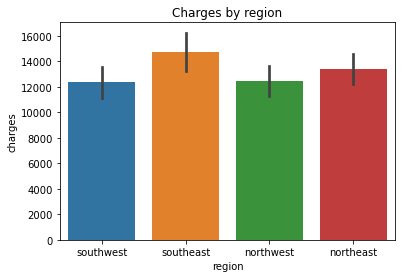

In [43]:
sns.barplot(x = df['region'], y = df['charges'],)
plt.title("Charges by region")
plt.show()

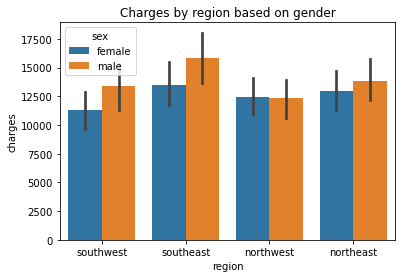

In [44]:
sns.barplot(x=df['region'], y=df['charges'], hue=df['sex'])
plt.title("Charges by region based on gender")
plt.show()

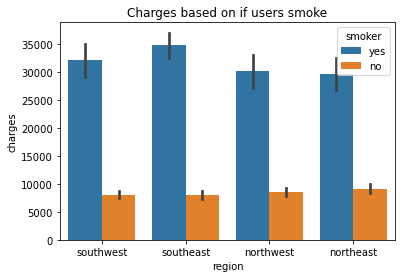

In [45]:
sns.barplot(x=df['region'], y=df['charges'], hue=df['smoker'])
plt.title("Charges based on if users smoke")
plt.show()

### As of right now we see that those that smoke end up having to pay more

In [96]:
def smoke_counter(df):
    count = 0
    yes_count = 0
    no_count = 0
    for i in df['smoker']:
        count += 1
        if i == 'yes': 
            yes_count += 1
        else:
            no_count += 1
    return yes_count/count

In [97]:
smoke_counter(df)

0.20478325859491778

### About 20% of our dataset is smokers

### As of National Blood, Heart and lung instituiton here are the ratings for bmi
- Underweight = <18.5
- Normal weight = 18.5–24.9
- Overweight = 25–29.9
- Obesity = BMI of 30 or greater

In [8]:
def classifier(df):
    if df['bmi'] < 18.5: 
        return "underweight"
    elif 18.5 >= df['bmi'] <= 24.9:  
        return "normal weight"
    elif 25 >= df['bmi'] <= 29.9:
        return "overweight"
    else:
        return "obesity"

In [9]:
df["classification"] = df.apply(classifier, axis=1)

In [10]:
df

,age,sex,bmi,children,smoker,region,charges,classification
0,19,female,27.900,0,yes,southwest,16884.92400,obesity
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,overweight
4,32,male,28.880,0,no,northwest,3866.85520,obesity
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obesity
1334,18,female,31.920,0,no,northeast,2205.98080,obesity
1335,18,female,36.850,0,no,southeast,1629.83350,obesity
1336,21,female,25.800,0,no,southwest,2007.94500,obesity


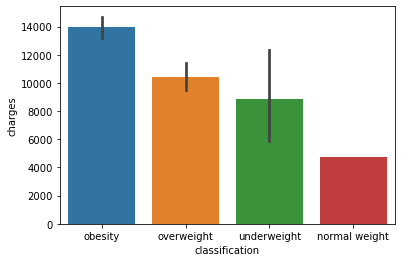

In [11]:
sns.barplot(x=df['classification'], y=df['charges'])
plt.show()

### How are charges impacted by age groups?

In [12]:
def age_classifier(df):
    if 18 >= df['age'] <= 30:  
        return "Young adult"
    elif 31 >= df['age'] <= 45:
        return "Adult"
    elif 45 < df['age'] <= 60:
        return "Middle Age"
    else:
        return "older"

In [13]:
df["age_group"] = df.apply(age_classifier, axis=1)

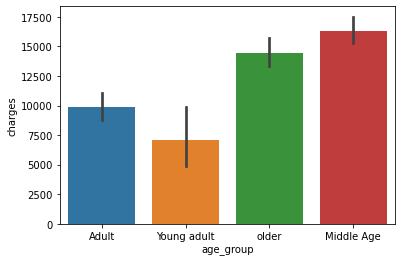

In [14]:
sns.barplot(x=df['age_group'], y=df['charges'])
plt.show()

In [15]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Not all columns are showing correlation since they are strings. Let's convert them into numerical values. 

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex)
df.sex = label.transform(df.sex)
label.fit(df.smoker)
df.smoker = label.transform(df.smoker)
label.fit(df.region)
df.region = label.transform(df.region)
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
classification     object
age_group          object
dtype: object

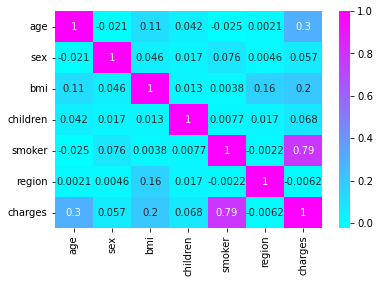

In [17]:
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

### Off the correlation matrix, smokers seem to be highly correlated with charges

### Let's look at the distribution of charges for smokers and nonsmokers

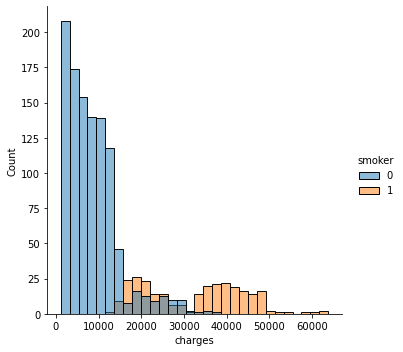

In [18]:
sns.displot(x=df['charges'], hue=df['smoker'] )

### Distribution for smokers

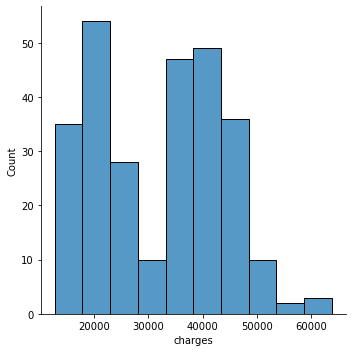

In [19]:
sns.displot(x=df[(df['smoker']==1)]['charges'])

### Distribution for nonsmokers

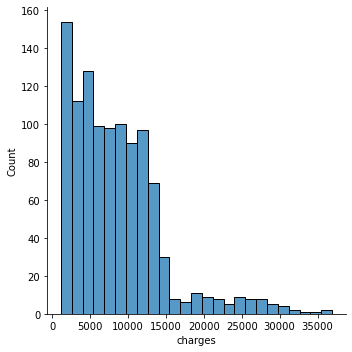

In [20]:
sns.displot(x=df[(df['smoker']==0)]['charges'])

### Obervations
- Smokers are spending more in comparson to nonsmokers
- Let's see how these how bmi, age and children correlate with the charges of those that smoke

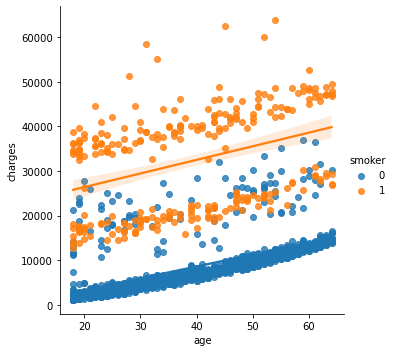

In [21]:
sns.lmplot(data= df, x='age', y='charges', hue='smoker')

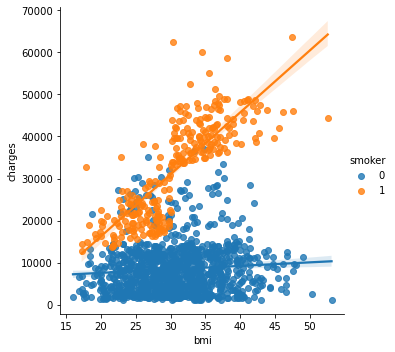

In [22]:
sns.lmplot(data= df, x='bmi', y='charges', hue='smoker')

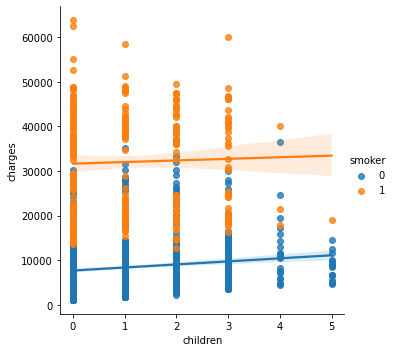

In [23]:
sns.lmplot(data= df, x='children', y='charges', hue='smoker')

- An observation between charges in smokers with children, is that those that smoke tend have fewer children. 
- We also see an upwards trend as smokers age their charges tend to increase
- Age itself doesn't seem to impact charges